In [1]:
import numpy as np
import pickle 
import sys, os
sys.path.append("..")
from logger import Logger
import matplotlib.pyplot as plt

In [2]:
# get logger for runs with no inner update (i.e. typical cva) with 1 eval update and 1 task per meta-update
root = '../cva_sine_result_files/'
exp = '_10_0_25'
with open(root+'1000'+exp+'.pkl', 'rb') as f:
    cva1k = pickle.load(f)

with open(root+'10000'+exp+'.pkl', 'rb') as f:
    cva10k = pickle.load(f)

with open(root+'100000'+exp+'.pkl', 'rb') as f:
    cva100k = pickle.load(f)
    
with open(root+'1000000'+exp+'.pkl', 'rb') as f:
    cva1M = pickle.load(f)

# get baseline CAVIA data 
root = '../sine_result_files/'
with open(root+'1000__1_1.pkl', 'rb') as f:
    cavia1k = pickle.load(f)

with open(root+'10000__1_1.pkl', 'rb') as f:
    cavia10k = pickle.load(f)

with open(root+'100000__1_1.pkl', 'rb') as f:
    cavia100k = pickle.load(f)

with open(root+'1000000__1_1.pkl', 'rb') as f:
    cavia1M = pickle.load(f)

In [3]:
cva1k.test_loss = np.asarray(cva1k.test_loss)
cva1k.test_conf = np.asarray(cva1k.test_conf)

cva10k.test_loss = np.asarray(cva10k.test_loss)
cva10k.test_conf = np.asarray(cva10k.test_conf)

cva100k.test_loss = np.asarray(cva100k.test_loss)
cva100k.test_conf = np.asarray(cva100k.test_conf)

cva1M.test_loss = np.asarray(cva1M.test_loss)
cva1M.test_conf = np.asarray(cva1M.test_conf)

cavia1k.test_loss = np.asarray(cavia1k.test_loss)
cavia1k.test_conf = np.asarray(cavia1k.test_conf)

cavia10k.test_loss = np.asarray(cavia10k.test_loss)
cavia10k.test_conf = np.asarray(cavia10k.test_conf)

cavia100k.test_loss = np.asarray(cavia100k.test_loss)
cavia100k.test_conf = np.asarray(cavia100k.test_conf)

cavia1M.test_loss = np.asarray(cavia1M.test_loss)
cavia1M.test_conf = np.asarray(cavia1M.test_conf)

In [4]:
cva1k.valid_loss = np.asarray(cva1k.valid_loss)
cva1k.valid_conf = np.asarray(cva1k.valid_conf)

cva10k.valid_loss = np.asarray(cva10k.valid_loss)
cva10k.valid_conf = np.asarray(cva10k.valid_conf)

cva100k.valid_loss = np.asarray(cva100k.valid_loss)
cva100k.valid_conf = np.asarray(cva100k.valid_conf)

cva1M.valid_loss = np.asarray(cva1M.valid_loss)
cva1M.valid_conf = np.asarray(cva1M.valid_conf)

cavia1k.valid_loss = np.asarray(cavia1k.valid_loss)
cavia1k.valid_conf = np.asarray(cavia1k.valid_conf)

cavia10k.valid_loss = np.asarray(cavia10k.valid_loss)
cavia10k.valid_conf = np.asarray(cavia10k.valid_conf)

cavia100k.valid_loss = np.asarray(cavia100k.valid_loss)
cavia100k.valid_conf = np.asarray(cavia100k.valid_conf)

cavia1M.valid_loss = np.asarray(cavia1M.valid_loss)
cavia1M.valid_conf = np.asarray(cavia1M.valid_conf)

In [5]:
cva1k.train_loss = np.asarray(cva1k.train_loss)
cva1k.train_conf = np.asarray(cva1k.train_conf)

cva10k.train_loss = np.asarray(cva10k.train_loss)
cva10k.train_conf = np.asarray(cva10k.train_conf)

cva100k.train_loss = np.asarray(cva100k.train_loss)
cva100k.train_conf = np.asarray(cva100k.train_conf)

cva1M.train_loss = np.asarray(cva1M.train_loss)
cva1M.train_conf = np.asarray(cva1M.train_conf)

cavia1k.train_loss = np.asarray(cavia1k.train_loss)
cavia1k.train_conf = np.asarray(cavia1k.train_conf)

cavia10k.train_loss = np.asarray(cavia10k.train_loss)
cavia10k.train_conf = np.asarray(cavia10k.train_conf)

cavia100k.train_loss = np.asarray(cavia100k.train_loss)
cavia100k.train_conf = np.asarray(cavia100k.train_conf)

cavia1M.train_loss = np.asarray(cavia1M.train_loss)
cavia1M.train_conf = np.asarray(cavia1M.train_conf)

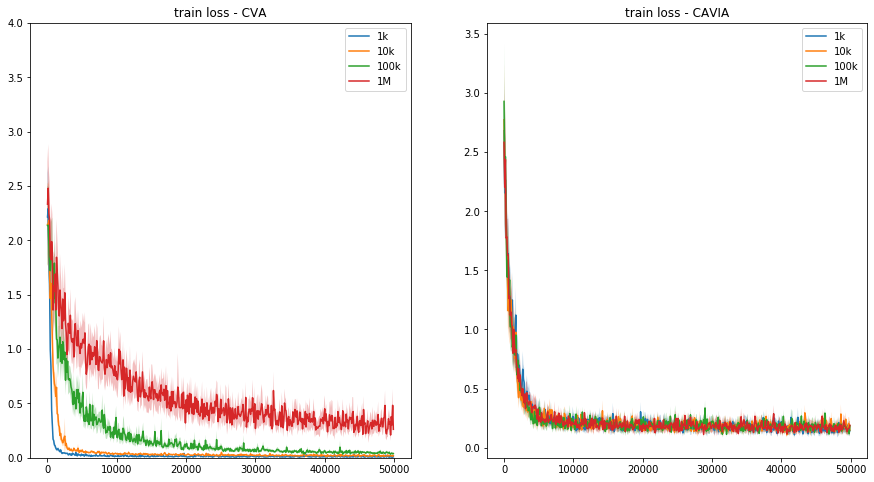

In [6]:
x = [i*100 for i in range(len(cva1k.train_loss))]
alpha = 0.3
plt.subplot(1,2,1)
plt.plot(x, cva1k.train_loss, label='1k')
plt.fill_between(x, cva1k.train_loss-cva1k.train_conf, cva1k.train_loss+cva1k.train_conf, alpha=alpha)

plt.plot(x, cva10k.train_loss, label='10k')
plt.fill_between(x, cva10k.train_loss-cva10k.train_conf, cva10k.train_loss+cva10k.train_conf, alpha=alpha)

plt.plot(x, cva100k.train_loss, label='100k')
plt.fill_between(x, cva100k.train_loss-cva100k.train_conf, cva100k.train_loss+cva100k.train_conf, alpha=alpha)

plt.plot(x, cva1M.train_loss, label='1M')
plt.fill_between(x, cva1M.train_loss-cva1M.train_conf, cva1M.train_loss+cva1M.train_conf, alpha=alpha)

plt.ylim((0,4))
plt.title('train loss - CVA')
plt.legend()

plt.subplot(1,2,2)
plt.plot(x, cavia1k.train_loss, label='1k')
plt.fill_between(x, cavia1k.train_loss-cavia1k.train_conf, cavia1k.train_loss+cavia1k.train_conf, alpha=alpha)

plt.plot(x, cavia10k.train_loss, label='10k')
plt.fill_between(x, cavia10k.train_loss-cavia10k.train_conf, cavia10k.train_loss+cavia10k.train_conf, alpha=alpha)

plt.plot(x, cavia100k.train_loss, label='100k')
plt.fill_between(x, cavia100k.train_loss-cavia100k.train_conf, cavia100k.train_loss+cavia100k.train_conf, alpha=alpha)

plt.plot(x, cavia1M.train_loss, label='1M')
plt.fill_between(x, cavia1M.train_loss-cavia1M.train_conf, cavia1M.train_loss+cavia1M.train_conf, alpha=alpha)

plt.title('train loss - CAVIA')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

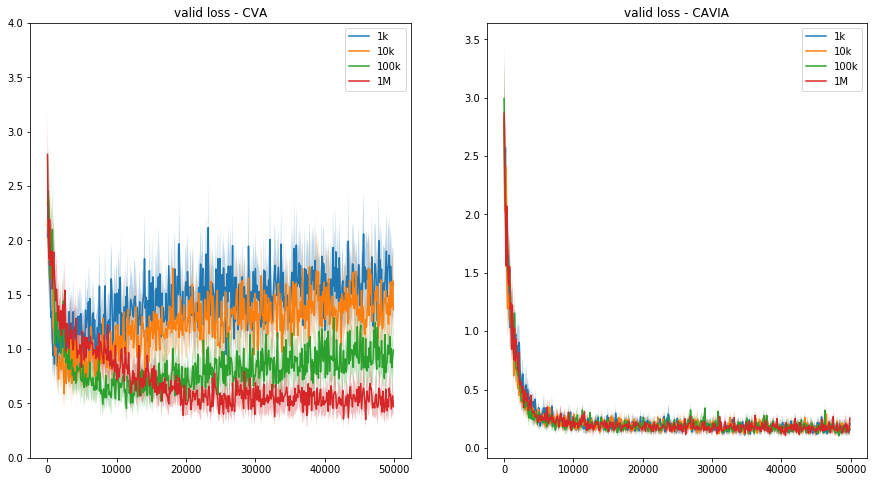

In [7]:
x = [i*100 for i in range(len(cva1k.valid_loss))]
alpha = 0.3
plt.subplot(1,2,1)
plt.plot(x, cva1k.valid_loss, label='1k')
plt.fill_between(x, cva1k.valid_loss-cva1k.valid_conf, cva1k.valid_loss+cva1k.valid_conf, alpha=alpha)

plt.plot(x, cva10k.valid_loss, label='10k')
plt.fill_between(x, cva10k.valid_loss-cva10k.valid_conf, cva10k.valid_loss+cva10k.valid_conf, alpha=alpha)

plt.plot(x, cva100k.valid_loss, label='100k')
plt.fill_between(x, cva100k.valid_loss-cva100k.valid_conf, cva100k.valid_loss+cva100k.valid_conf, alpha=alpha)

plt.plot(x, cva1M.valid_loss, label='1M')
plt.fill_between(x, cva1M.valid_loss-cva1M.valid_conf, cva1M.valid_loss+cva1M.valid_conf, alpha=alpha)

plt.ylim((0,4))
plt.title('valid loss - CVA')
plt.legend()

plt.subplot(1,2,2)
plt.plot(x, cavia1k.valid_loss, label='1k')
plt.fill_between(x, cavia1k.valid_loss-cavia1k.valid_conf, cavia1k.valid_loss+cavia1k.valid_conf, alpha=alpha)

plt.plot(x, cavia10k.valid_loss, label='10k')
plt.fill_between(x, cavia10k.valid_loss-cavia10k.valid_conf, cavia10k.valid_loss+cavia10k.valid_conf, alpha=alpha)

plt.plot(x, cavia100k.valid_loss, label='100k')
plt.fill_between(x, cavia100k.valid_loss-cavia100k.valid_conf, cavia100k.valid_loss+cavia100k.valid_conf, alpha=alpha)

plt.plot(x, cavia1M.valid_loss, label='1M')
plt.fill_between(x, cavia1M.valid_loss-cavia1M.valid_conf, cavia1M.valid_loss+cavia1M.valid_conf, alpha=alpha)

plt.title('valid loss - CAVIA')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()


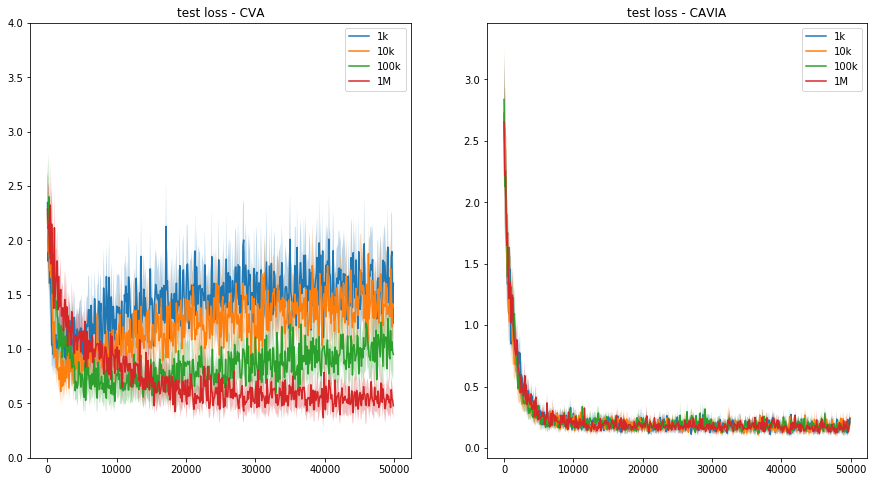

In [8]:
x = [i*100 for i in range(len(cva1k.test_loss))]
alpha = 0.3
plt.subplot(1,2,1)
plt.plot(x, cva1k.test_loss, label='1k')
plt.fill_between(x, cva1k.test_loss-cva1k.test_conf, cva1k.test_loss+cva1k.test_conf, alpha=alpha)

plt.plot(x, cva10k.test_loss, label='10k')
plt.fill_between(x, cva10k.test_loss-cva10k.test_conf, cva10k.test_loss+cva10k.test_conf, alpha=alpha)

plt.plot(x, cva100k.test_loss, label='100k')
plt.fill_between(x, cva100k.test_loss-cva100k.test_conf, cva100k.test_loss+cva100k.test_conf, alpha=alpha)

plt.plot(x, cva1M.test_loss, label='1M')
plt.fill_between(x, cva1M.test_loss-cva1M.test_conf, cva1M.test_loss+cva1M.test_conf, alpha=alpha)

plt.ylim((0,4))
plt.title('test loss - CVA')
plt.legend()

plt.subplot(1,2,2)
plt.plot(x, cavia1k.test_loss, label='1k')
plt.fill_between(x, cavia1k.test_loss-cavia1k.test_conf, cavia1k.test_loss+cavia1k.test_conf, alpha=alpha)

plt.plot(x, cavia10k.test_loss, label='10k')
plt.fill_between(x, cavia10k.test_loss-cavia10k.test_conf, cavia10k.test_loss+cavia10k.test_conf, alpha=alpha)

plt.plot(x, cavia100k.test_loss, label='100k')
plt.fill_between(x, cavia100k.test_loss-cavia100k.test_conf, cavia100k.test_loss+cavia100k.test_conf, alpha=alpha)

plt.plot(x, cavia1M.test_loss, label='1M')
plt.fill_between(x, cavia1M.test_loss-cavia1M.test_conf, cavia1M.test_loss+cavia1M.test_conf, alpha=alpha)

plt.title('test loss - CAVIA')
plt.legend()
fig = plt.gcf()
fig.set_size_inches(15,8)
plt.show()

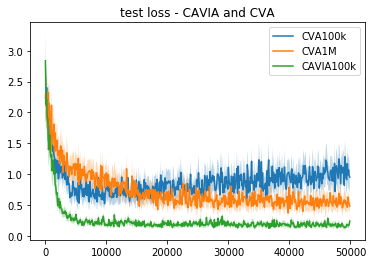

In [10]:
# one plot, with CVA cv CAVIA with 
x = [i*100 for i in range(len(cva1k.test_loss))]
alpha = 0.3

# plt.plot(x, cva1k.test_loss, label='CVA1k')
# plt.fill_between(x, cva1k.test_loss-cva1k.test_conf, cva1k.test_loss+cva1k.test_conf, alpha=alpha)

# plt.plot(x, cva10k.test_loss, label='CVA10k')
# plt.fill_between(x, cva10k.test_loss-cva10k.test_conf, cva10k.test_loss+cva10k.test_conf, alpha=alpha)

plt.plot(x, cva100k.test_loss, label='CVA100k')
plt.fill_between(x, cva100k.test_loss-cva100k.test_conf, cva100k.test_loss+cva100k.test_conf, alpha=alpha)

plt.plot(x, cva1M.test_loss, label='CVA1M')
plt.fill_between(x, cva1M.test_loss-cva1M.test_conf, cva1M.test_loss+cva1M.test_conf, alpha=alpha)

# plt.plot(x, cavia1k.test_loss, label='CAVIA1k')
# plt.fill_between(x, cavia1k.test_loss-cavia1k.test_conf, cavia1k.test_loss+cavia1k.test_conf, alpha=alpha)

# plt.plot(x, cavia10k.test_loss, label='CAVIA10k')
# plt.fill_between(x, cavia10k.test_loss-cavia10k.test_conf, cavia10k.test_loss+cavia10k.test_conf, alpha=alpha)

plt.plot(x, cavia100k.test_loss, label='CAVIA100k')
plt.fill_between(x, cavia100k.test_loss-cavia100k.test_conf, cavia100k.test_loss+cavia100k.test_conf, alpha=alpha)

# plt.plot(x, cavia1M.test_loss, label='CAVIA1M')
# plt.fill_between(x, cavia1M.test_loss-cavia1M.test_conf, cavia1M.test_loss+cavia1M.test_conf, alpha=alpha)


plt.title('test loss - CAVIA and CVA')
plt.legend()

# fig = plt.gcf()
# fig.set_size_inches(,8)
plt.show()